# EM Algorithm

Example from the paper [Maximum Likelihood from Incomplete Data via the EM Algorithm](https://www.jstor.org/stable/2984875?seq=2#metadata_info_tab_contents).

---

197 animals are distributed multinomially in 4 categories.

In [441]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Data.
y = [125, 18, 20, 34]

def get_probs(pi):
    return [0.5 + 0.25 * pi, 0.25 * (1 - pi), 0.25 * (1 - pi), 0.25 * pi]

# Probs.
probs = get_probs(0.6)

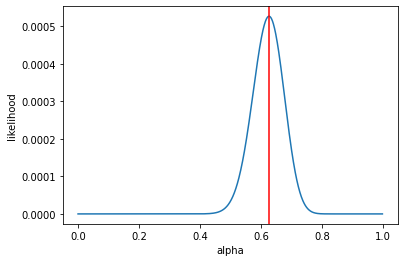

In [445]:
factorial = lambda x: x * factorial(x-1) if x > 1 else x

def multinomial_likelihood(y, probs):
    likelihood = (factorial(sum(y)) / np.prod([factorial(yi) for yi in y])) 
    return likelihood * np.prod([ti[0] ** ti[1] for ti in zip(probs, y)])

x_ = np.arange(0,1,0.001)
y_ = [multinomial_likelihood(y, get_probs(xi)) for xi in x_]
plt.xlabel('alpha')
plt.ylabel('likelihood')
plt.plot(x_, y_)
plt.axvline(x=0.62558929121, color='r')


Splitting the first category into two categories we get:

In [488]:
def get_probs2(pi):
    return [0.5, 0.25 * pi, 0.25 * (1 - pi), 0.25 * (1 - pi), 0.25 * pi]

y2 = [1, 124, 18, 20, 34]
likelihood = multinomial_likelihood(y2, get_probs2(0.1))
likelihood

def get_data(x):
    return [x, 125 - x, 18, 20, 34]

X_ = np.arange(1,125,1).tolist()
Y_ = np.arange(0,1,0.01).tolist()

x_ = []
y_ = []
z_ = []
for i in range(len(X_)):
    x_.append([])
    y_.append([])
    z_.append([])
    for j in range(len(Y_)):
        x_[i].append(X_[i])
        y_[i].append(Y_[j])        
        z_[i].append(multinomial_likelihood(get_data(X_[i]), get_probs2(Y_[j])))
        
X = np.array(x_)
Y = np.array(y_)

Text(0.5, 0, 'alpha')

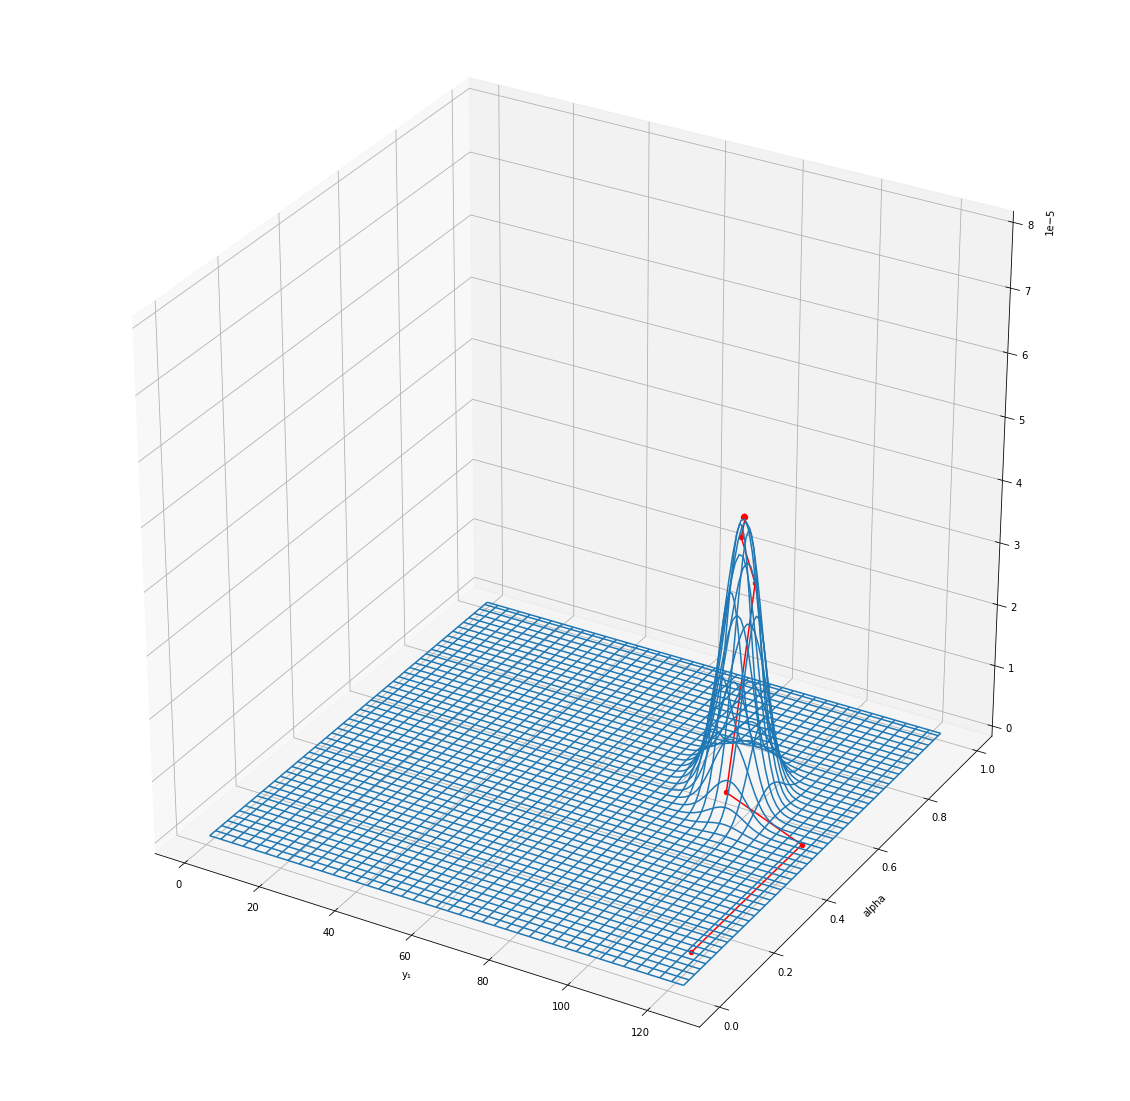

In [555]:
Z = np.array(z_)
fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')

ax.plot_wireframe(X, Y, Z)

data_points = [
    [119.04761904761904, 0.1, 1.6297897797634157e-29],
    [119.04761904761904, 0.5125229077580941, 3.03184881900109e-11],
    [99.50158035497203, 0.5125229077580941, 4.8227602513699236e-06],
    [99.50158035497203, 0.61025009289022, 3.4560399925325374e-05],    
    [95.77626323276384, 0.61025009289022, 4.114844074896803e-05],        
    [95.77626323276384, 0.6245939814751065, 4.378119425059777e-05],            
    [95.25282834775531, 0.6245939814751065, 4.378119425059777e-05],                
    [95.25282834775531, 0.626525245046832, 4.385087669373454e-05],                    
    [95.18278968437723, 0.626525245046832, 4.385087669373454e-05],                        
    [95.18278968437723, 0.6267821532115843, 4.385479271117017e-05],                                       
]

X_ = [p[0] for p in data_points]
Y_ = [p[1] for p in data_points]
Z_ = [p[2] for p in data_points]
ax.plot(X_, Y_, Z_, color='r')    
  
for p in data_points:
    ax.scatter([[p[0]]], [[p[1]]], [[p[2]]], color='r')
    
# plot_point(95, 0.626525245046832)

ax.set_zlim(0,0.00008)
ax.view_init(30, -60)
plt.xlabel('y₁')
plt.ylabel('alpha')
# plt.draw()


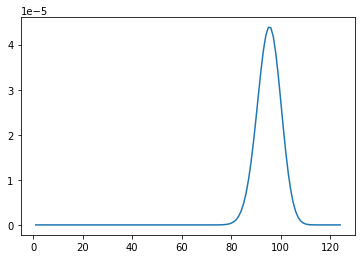

In [170]:
pi = 0.6268214841396688
x_ = np.arange(1,125,1).tolist()
y_ = [multinomial_likelihood(get_data(xi), get_probs2(pi)) for xi in x_]
plt.plot(x_, y_)

Expectation Step

In [160]:
def expectation_step(pi_estimate):
    x1 = (125 * 0.5) / (0.5 + 0.25 * pi_estimate)
    x2 = (125 * 0.25 * pi_estimate) / (0.5 + 0.25 * pi_estimate)
    return x1, x2

Maximization Step

In [161]:
def maximization_step(x2):
    return (x2 + 34) / (x2 + 34 + 18 + 20)

Iterate

In [474]:
pi_estimate = 0.1

for i in range(8):
    print(x1, x2, pi_estimate)    
    x1, x2 = expectation_step(pi_estimate)
    pi_estimate = maximization_step(x2)

95.17204912772992 29.827950872270073 0.1
119.04761904761904 5.9523809523809526 0.5125229077580941
99.50158035497203 25.498419645027962 0.61025009289022
95.77626323276384 29.22373676723615 0.6245939814751065
95.25282834775531 29.74717165224469 0.626525245046832
95.18278968437723 29.817210315622763 0.6267821532115843
95.17348048613104 29.826519513868956 0.6268162735855434
95.1722442539751 29.827755746024906 0.6268208041943081


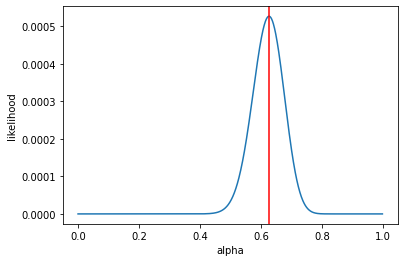

In [473]:
factorial = lambda x: x * factorial(x-1) if x > 1 else x

def multinomial_likelihood(y, probs):
    likelihood = (factorial(sum(y)) / np.prod([factorial(yi) for yi in y])) 
    return likelihood * np.prod([ti[0] ** ti[1] for ti in zip(probs, y)])

x_ = np.arange(0,1,0.001)
y_ = [multinomial_likelihood(y, get_probs(xi)) for xi in x_]
plt.xlabel('alpha')
plt.ylabel('likelihood')
plt.plot(x_, y_)
plt.axvline(x=0.6268904227212334, color='r')


#### Derivative and second derivative

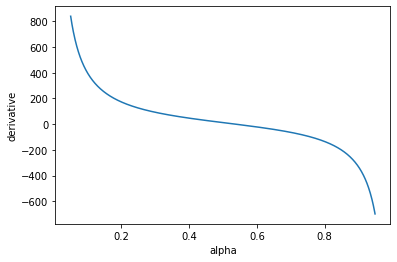

In [458]:
x2 = 10
y2 = 18
y3 = 20
y4 = 34

def derivative(x2, y2, y3, y4, alpha):
    return (x2 + y4) / alpha - (y2 + y3) / (1 - alpha)

x_ = np.arange(0.05,0.95,0.001)
y_ = [derivative(x2, y2, y3, y4, xi) for xi in x_]
plt.xlabel('alpha')
plt.ylabel('derivative')
plt.plot(x_, y_)


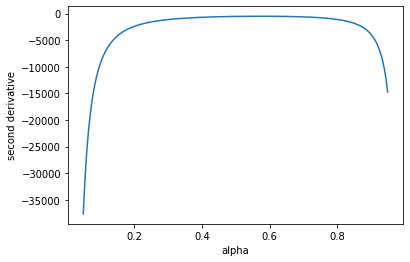

In [456]:
def second_derivative(x2, y2, y3, y4, alpha):
    return -(x2 + y4) / alpha ** 2 - (y2 + y3) / (1 - alpha) ** 2

x_ = np.arange(0.05,0.95,0.001)
y_ = [second_derivative(x2, y2, y3, y4, xi) for xi in x_]
plt.xlabel('alpha')
plt.ylabel('second derivative')
plt.plot(x_, y_)


### 2 Mixture Models

''

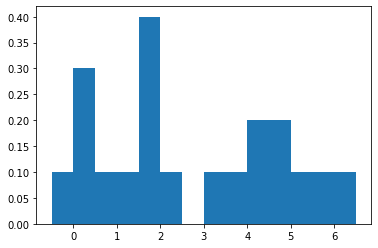

In [558]:
%matplotlib inline

data = [
    -0.39, 0.12, 0.94, 1.67, 1.76, 2.44, 3.72, 4.28, 4.92, 5.53, 
     0.06, 0.48, 1.01, 1.68, 1.80, 3.25, 4.12, 4.60, 5.28, 6.22
]

plt.hist(data, bins=14, range=(-0.5, 6.5), density=True)
;

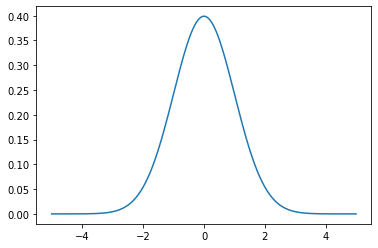

In [559]:
import math 

sigma = 1.0
mu = 0

def normal_distribution_pdf(x, mu, sigma):
    return (1 / (sigma * math.sqrt(2 * math.pi))) * math.e ** (-0.5 * ((x - mu) / sigma) ** 2)


x = np.arange(-5, 5, 0.01)
y = [normal_distribution_pdf(xi, mu, sigma) for xi in x]
plt.plot(x, y)
    

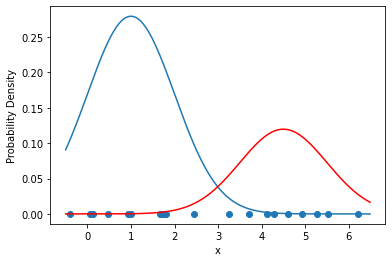

In [585]:
pi = 0.3
sigma1 = 1.0
mu1 = 1
sigma2 = 1.0
mu2 = 4.5

def mixture_pdf(x, pi, mu1, sigma1, mu2, sigma2):
    return (1 - pi) * normal_distribution_pdf(x, mu1, sigma1) + pi * normal_distribution_pdf(x, mu2, sigma2)

def joe(x, pi, mu1, sigma1, mu2, sigma2):
    return (1 - pi) * normal_distribution_pdf(x, mu1, sigma1)

def jay(x, pi, mu1, sigma1, mu2, sigma2):
    return pi * normal_distribution_pdf(x, mu2, sigma2)

y = [0] * len(data)
plt.scatter(data, y)

x = np.arange(-0.5, 6.5, 0.01)
y = [joe(xi, pi, mu1, sigma1, mu2, sigma2) for xi in x]
# y = [mixture_pdf(xi, pi, mu1, sigma1, mu2, sigma2) for xi in x]
plt.plot(x, y)

x = np.arange(-0.5, 6.5, 0.01)
y = [jay(xi, pi, mu1, sigma1, mu2, sigma2) for xi in x]
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.plot(x, y, color='r')

### Likelihood

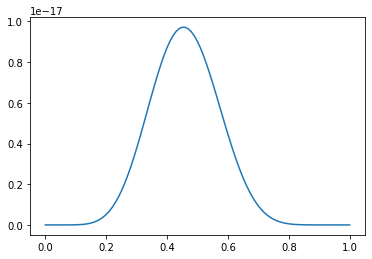

In [565]:
def likelihood(data, pi, mu1, sigma1, mu2, sigma2):
    likelihood = 1
    for x in data:
        likelihood *= mixture_pdf(x, pi, mu1, sigma1, mu2, sigma2)
    return likelihood

def log_likelihood(data, pi, mu1, sigma1, mu2, sigma2):
    return np.log(likelihood(data, pi, mu1, sigma1, mu2, sigma2))

x = np.arange(0.0, 1.01, 0.01)
y = [likelihood(data, xi, mu1, sigma1, mu2, sigma2) for xi in x]

# plt.xlabel('alpha')
# plt.ylabel('second derivative')
plt.plot(x, y)

In [282]:
pi = 0.3
sigma1 = 1.0
mu1 = 1
sigma2 = 1.0
mu2 = 3.0

def likelihood_yeah(data, pi, mu1, sigma1, mu2, sigma2):
    # return 1
    return mixture_pdf(data, pi, mu1, sigma1, mu2, sigma2)
    
def derivative_mean1(data, pi, mu1, sigma1, mu2, sigma2):
    d = 0
    for xi in data:
        d += (-1 / sigma1) * normal_distribution_pdf(xi, mu1, sigma1) * ((xi - mu1) / sigma1)
    return ((1 - pi) / likelihood_yeah(xi, pi, mu1, sigma1, mu2, sigma2)) * d

def derivative_mean2(data, pi, mu1, sigma1, mu2, sigma2):
    d = 0
    for xi in data:
        d += (-1 / sigma2) * normal_distribution_pdf(xi, mu2, sigma2) * ((xi - mu2) / sigma2)
    return (pi / likelihood_yeah(xi, pi, mu1, sigma1, mu2, sigma2)) * d

def derivative_sigma1(data, pi, mu1, sigma1, mu2, sigma2):
    d = 0
    for xi in data:
        d += (-1 / sigma1) * normal_distribution_pdf(xi, mu1, sigma1) * (1 - ((xi - mu1) / sigma1) ** 2)
    return ((1 - pi) / likelihood_yeah(xi, pi, mu1, sigma1, mu2, sigma2)) * d

def derivative_sigma2(data, pi, mu1, sigma1, mu2, sigma2):
    d = 0
    for xi in data:
        d += (-1 / sigma2) * normal_distribution_pdf(xi, mu2, sigma2) * (1 - ((xi - mu2) / sigma2) ** 2)
    return (pi / likelihood_yeah(xi, pi, mu1, sigma1, mu2, sigma2)) * d

def derivative_pi(data, pi, mu1, sigma1, mu2, sigma2):
    d = 0
    for xi in data:
        d += -normal_distribution_pdf(xi, mu1, sigma1) + normal_distribution_pdf(xi, mu2, sigma2)
    return (1 / likelihood_yeah(xi, pi, mu1, sigma1, mu2, sigma2)) * d    

def clamp(x):
    if x > 10:
        return 10
    if x < -10:
        return -10
    return x

learning_rate = 0.0001

for i in range(100):
    d_mean1 = derivative_mean1(data, pi, mu1, sigma1, mu2, sigma2)
    mu1 += learning_rate * clamp(d_mean1)

    d_mean2 = derivative_mean2(data, pi, mu1, sigma1, mu2, sigma2)
    mu2 += learning_rate * clamp(d_mean2)

    d_sigma1 = derivative_sigma1(data, pi, mu1, sigma1, mu2, sigma2)
    sigma1 += learning_rate * clamp(d_sigma1)

    d_sigma2 = derivative_sigma2(data, pi, mu1, sigma1, mu2, sigma2)
    sigma2 += learning_rate * clamp(d_sigma2)

    d_pi = derivative_pi(data, pi, mu1, sigma1, mu2, sigma2)    
    pi += learning_rate * clamp(d_pi)    

    print('mu1:', mu1)
    print('mu2:', mu2)
    print('sigma1:', sigma1)
    print('sigma2:', sigma2)
    print('pi:', pi)
    print('likelihood:', likelihood(data, pi, mu1, sigma1, mu2, sigma2))    

mu1: 0.999
mu2: 3.001
sigma1: 0.999
sigma2: 1.001
pi: 0.299
likelihood: 7.716341291988313e-23
mu1: 0.998
mu2: 3.002
sigma1: 0.998
sigma2: 1.0019999999999998
pi: 0.298
likelihood: 7.851640281942216e-23
mu1: 0.997
mu2: 3.0029999999999997
sigma1: 0.997
sigma2: 1.0029999999999997
pi: 0.297
likelihood: 7.9871027242649e-23
mu1: 0.996
mu2: 3.0039999999999996
sigma1: 0.996
sigma2: 1.0039999999999996
pi: 0.296
likelihood: 8.122653341502266e-23
mu1: 0.995
mu2: 3.0049999999999994
sigma1: 0.995
sigma2: 1.0049999999999994
pi: 0.295
likelihood: 8.258215294546382e-23
mu1: 0.994
mu2: 3.0059999999999993
sigma1: 0.994
sigma2: 1.0059999999999993
pi: 0.294
likelihood: 8.39371023589056e-23
mu1: 0.993
mu2: 3.0069999999999992
sigma1: 0.993
sigma2: 1.0069999999999992
pi: 0.293
likelihood: 8.529058366040268e-23
mu1: 0.992
mu2: 3.007999999999999
sigma1: 0.992
sigma2: 1.0079999999999991
pi: 0.292
likelihood: 8.664178493057834e-23
mu1: 0.991
mu2: 3.008999999999999
sigma1: 0.991
sigma2: 1.008999999999999
pi: 0.291

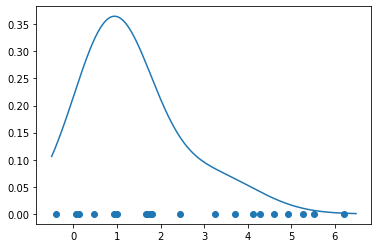

In [283]:
y = [0] * len(data)
plt.scatter(data, y)

x = np.arange(-0.5, 6.5, 0.01)
y = [mixture_pdf(xi, pi, mu1, sigma1, mu2, sigma2) for xi in x]
plt.plot(x, y)

### Normal fitting

-12.293296520222952

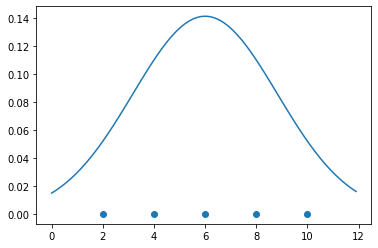

In [305]:
data = [2, 4, 6, 8, 10]
mu = 4
sigma = 1

mu = np.mean(data)
sigma = np.sqrt(np.var(data))

y = [0] * len(data)
plt.scatter(data, y)

x = np.arange(0, 12, 0.1)
y = [normal_distribution_pdf(xi, mu, sigma) for xi in x]
plt.plot(x, y)

def log_likelihood(data, mu, sigma):
    n = len(data)
    likelihood = -(n/2) * np.log(2 * math.pi) 
    likelihood += -n * np.log(sigma) 
    likelihood += (-1 / (2 * sigma ** 2)) * np.sum([(xi - mu)**2 for xi in data])
    return likelihood

log_likelihood(data, mu, sigma)

In [319]:
sigma = 1.0
mu = 1

def d_mu(data, mu, sigma):
    return np.sum([(xi - mu) for xi in data]) / (sigma ** 2)

def d_sigma(data, mu, sigma):
    return np.sum([(xi - mu) ** 2 for xi in data]) / (sigma ** 3) - len(data) / sigma

learning_rate = 0.1
for i in range(1000):
    mu += learning_rate * np.clip(d_mu(data, mu, sigma), -1, 1)
    sigma += learning_rate * np.clip(d_sigma(data, mu, sigma), -1, 1)

print('expected:  ', -12.293296520222952)
print('likelihood:', log_likelihood(data, mu, sigma))    

print('mu:', mu)
print('sigma:', sigma)

expected:   -12.293296520222952
likelihood: -12.293296520222952
mu: 5.999999999999993
sigma: 2.8284271247461916


7.581279420118937e-23
mu1: 1.0286388178174752
mu2: 4.531832692909676
sigma1: 0.8674364994060499
sigma2: 0.9885702475276976
pi: 0.46063304441682235


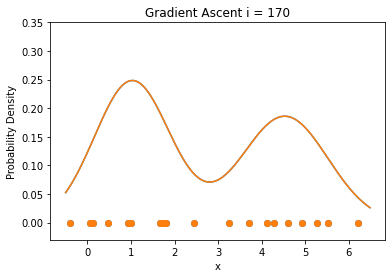

In [619]:
pi = 0.3
sigma1 = 1.0
mu1 = 1
sigma2 = 1.0
mu2 = 3.0

data = [
    -0.39, 0.12, 0.94, 1.67, 1.76, 2.44, 3.72, 4.28, 4.92, 5.53, 
     0.06, 0.48, 1.01, 1.68, 1.80, 3.25, 4.12, 4.60, 5.28, 6.22
]

y = [0] * len(data)
plt.scatter(data, y)

x = np.arange(-0.5, 6.5, 0.01)
y = [mixture_pdf(xi, pi, mu1, sigma1, mu2, sigma2) for xi in x]
plt.plot(x, y)

def mix(xi, pi, mu1, sigma1, mu2, sigma2):
    return (1 - pi) * normal_distribution_pdf(xi, mu1, sigma1) + pi * normal_distribution_pdf(xi, mu2, sigma2)

def likelihood(data, pi, mu1, sigma1, mu2, sigma2):
    likelihood = 1
    for xi in data:
        likelihood *= mix(xi, pi, mu1, sigma1, mu2, sigma2)
    return likelihood

print(likelihood(data, pi, mu1, sigma1, mu2, sigma2))

def d_mu1(data, pi, mu1, sigma1, mu2, sigma2):
    d = 0
    for xi in data:
        d_ = (1 / mix(xi, pi, mu1, sigma1, mu2, sigma2))
        d_ *= ((xi - mu1) / sigma1 ** 2)
        d_ *= normal_distribution_pdf(xi, mu1, sigma1)
        d += d_
    return d * (1 - pi)

def d_mu2(data, pi, mu1, sigma1, mu2, sigma2):
    d = 0
    for xi in data:
        d_ = (1 / mix(xi, pi, mu1, sigma1, mu2, sigma2))
        d_ *= ((xi - mu2) / sigma2 ** 2)
        d_ *= normal_distribution_pdf(xi, mu2, sigma2)
        d += d_
    return d * pi

def d_sigma1(data, pi, mu1, sigma1, mu2, sigma2):
    d = 0
    for xi in data:
        d_ = (1 / mix(xi, pi, mu1, sigma1, mu2, sigma2))
        d_ *= ((((xi - mu1) / sigma1) ** 2) - 1) / sigma1
        d_ *= normal_distribution_pdf(xi, mu1, sigma1)
        d += d_
    return d * (1 - pi)

def d_sigma2(data, pi, mu1, sigma1, mu2, sigma2):
    d = 0
    for xi in data:
        d_ = (1 / mix(xi, pi, mu1, sigma1, mu2, sigma2))
        d_ *= ((((xi - mu2) / sigma2) ** 2) - 1) / sigma2
        d_ *= normal_distribution_pdf(xi, mu2, sigma2)
        d += d_
    return d * pi

def d_pi(data, pi, mu1, sigma1, mu2, sigma2):
    d = 0
    for xi in data:
        d_ = (1 / mix(xi, pi, mu1, sigma1, mu2, sigma2))
        d_ *= -normal_distribution_pdf(xi, mu1, sigma1) + normal_distribution_pdf(xi, mu2, sigma2)
        d += d_
    return d * pi

learning_rate = 0.01
for i in range(170):
    mu1 += learning_rate * np.clip(d_mu1(data, pi, mu1, sigma1, mu2, sigma2), -1, 1)
    sigma1 += learning_rate * np.clip(d_sigma1(data, pi, mu1, sigma1, mu2, sigma2), -1, 1)
    mu2 += learning_rate * np.clip(d_mu2(data, pi, mu1, sigma1, mu2, sigma2), -1, 1)
    sigma2 += learning_rate * np.clip(d_sigma2(data, pi, mu1, sigma1, mu2, sigma2), -1, 1)
    pi += learning_rate * np.clip(d_pi(data, pi, mu1, sigma1, mu2, sigma2), -1, 1)
    
    print(i, likelihood(data, pi, mu1, sigma1, mu2, sigma2))

    plt.clf()
    y = [0] * len(data)
    plt.scatter(data, y)
    
    x = np.arange(-0.5, 6.5, 0.01)
    y = [mixture_pdf(xi, pi, mu1, sigma1, mu2, sigma2) for xi in x]
    plt.plot(x, y)
    plt.title('Gradient Ascent i = %d' % (i+1))    
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.ylim((-0.03, 0.35))
    plt.savefig('foo_' +  "%03d" % (i,) + '.png')

print('mu1:', mu1)
print('mu2:', mu2)
print('sigma1:', sigma1)
print('sigma2:', sigma2)
print('pi:', pi)

y = [0] * len(data)
plt.scatter(data, y)

x = np.arange(-0.5, 6.5, 0.01)
y = [mixture_pdf(xi, pi, mu1, sigma1, mu2, sigma2) for xi in x]
plt.plot(x, y)

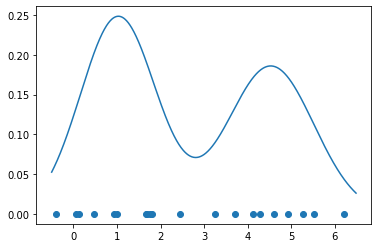

In [620]:
y = [0] * len(data)
plt.scatter(data, y)

x = np.arange(-0.5, 6.5, 0.01)
y = [mixture_pdf(xi, pi, mu1, sigma1, mu2, sigma2) for xi in x]
plt.plot(x, y)

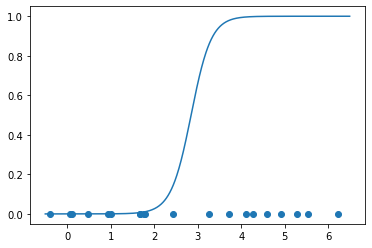

In [652]:
# Responsibility
def responsibility(xi, pi, mu1, sigma1, mu2, sigma2):
    r = pi * normal_distribution_pdf(xi, mu2, sigma2)
    r /= pi * normal_distribution_pdf(xi, mu2, sigma2) + (1 - pi) * normal_distribution_pdf(xi, mu1, sigma1)
    return r
   
y = [0] * len(data)
plt.scatter(data, y)

x = np.arange(-0.5, 6.5, 0.01)
y = [responsibility(xi, pi, mu1, sigma1, mu2, sigma2) for xi in x]

plt.plot(x, y)

### Expectation step

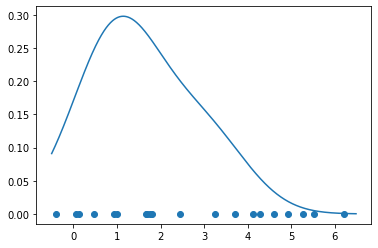

In [659]:
pi = 0.3
sigma1 = 1.0
mu1 = 1
sigma2 = 1.0
mu2 = 3.0

data = [
    -0.39, 0.12, 0.94, 1.67, 1.76, 2.44, 3.72, 4.28, 4.92, 5.53, 
     0.06, 0.48, 1.01, 1.68, 1.80, 3.25, 4.12, 4.60, 5.28, 6.22
]

def e_step(data, pi, mu1, sigma1, mu2, sigma2):
    taus = [responsibility(xi, pi, mu1, sigma1, mu2, sigma2) for xi in data]
    return taus

y = [0] * len(data)
plt.scatter(data, y)

x = np.arange(-0.5, 6.5, 0.01)
y = [mixture_pdf(xi, pi, mu1, sigma1, mu2, sigma2) for xi in x]
plt.plot(x, y)

### Maximization

In [660]:
def m_step(data, taus, pi, mu1, sigma1, mu2, sigma2):
    taus = np.array(taus)
    inv_taus = np.array([(1 - t) for t in taus])
    variance1 = [(xi - mu1) ** 2 for xi in data]
    variance2 = [(xi - mu2) ** 2 for xi in data]
    
    pi = sum(taus) / float(len(data))
    mu1 = sum(inv_taus * data) / sum(inv_taus)
    mu2 = sum(taus * data) / sum(taus)
    sigma1 = math.sqrt(sum(inv_taus * variance1) / sum(inv_taus))
    sigma2 = math.sqrt(sum(taus * variance2) / sum(taus))
    
    return pi, mu1, mu2, sigma1, sigma2

0.3 1 3.0 1.0 1.0
7.581279420118937e-23
0.5070890957709179 1.0118590799236298 4.290653544136449 0.9469279994949519 1.8220584375752185
2.452834399339682e-18
0.5296168877122966 0.985254858650603 4.174815426943971 0.8847852550453725 1.4230929749614643
5.709960740354266e-18
0.5205211205689813 0.9451524263397575 4.267491338870134 0.8468440527508596 1.2960366117290802
7.223403892540482e-18
0.5068709454836965 0.9509553941679042 4.351317204583676 0.8348155713061989 1.2063290855040376
8.402543858627029e-18
0.49303173417015883 0.9713770117960947 4.42576517825053 0.8376179600807095 1.1325600000134854
9.55782822328114e-18
0.48060670016221974 0.9947530470258962 4.489808260378387 0.8456791139777928 1.0690939303289033
1.0637434580708952e-17
0.47035393012148596 1.0165250640438963 4.541476871139186 0.8554327465334224 1.0168141183586985
1.149285106386161e-17
0.4624924558905848 1.034874508212453 4.580068534416084 0.8652800161410183 0.977361014458894
1.2047124130719708e-17
0.4568362923999194 1.04925405579

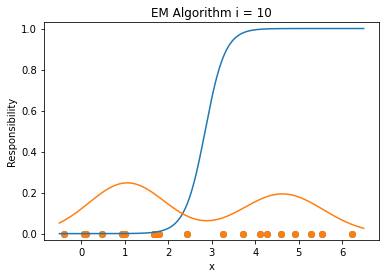

In [661]:
### Iterations

plt.clf()
y = [0] * len(data)
plt.scatter(data, y)

x = np.arange(-0.5, 6.5, 0.01)
y = [responsibility(xi, pi, mu1, sigma1, mu2, sigma2) for xi in x]
plt.plot(x, y)
    
plt.title('EM Algorithm i = 0')
plt.xlabel('x')
plt.ylabel('Responsibility')
plt.ylim((-0.03, 1.03))
plt.savefig('foo_' +  "%03d" % (0,) + '.png')

for i in range(10):
    print(pi, mu1, mu2, sigma1, sigma2)
    print(likelihood(data, pi, mu1, sigma1, mu2, sigma2))    
    taus = e_step(data, pi, mu1, sigma1, mu2, sigma2)
    pi, mu1, mu2, sigma1, sigma2 = m_step(data, taus, pi, mu1, sigma1, mu2, sigma2)
    
    plt.clf()
    y = [0] * len(data)
    plt.scatter(data, y)

    x = np.arange(-0.5, 6.5, 0.01)
    y = [responsibility(xi, pi, mu1, sigma1, mu2, sigma2) for xi in x]
    plt.plot(x, y)
    
    """
    x = np.arange(-0.5, 6.5, 0.01)
    y = [mixture_pdf(xi, pi, mu1, sigma1, mu2, sigma2) for xi in x]
    plt.plot(x, y)
    plt.title('EM Algorithm i = %d' % (i+1))    
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.ylim((-0.03, 0.35))
    """

    plt.title('EM Algorithm i = %d' % (i+1))    
    plt.xlabel('x')
    plt.ylabel('Responsibility')
    plt.ylim((-0.03, 1.03))
    plt.savefig('foo_' +  "%03d" % (i+1,) + '.png')
    
y = [0] * len(data)
plt.scatter(data, y)

x = np.arange(-0.5, 6.5, 0.01)
y = [mixture_pdf(xi, pi, mu1, sigma1, mu2, sigma2) for xi in x]
plt.plot(x, y)

In [ ]:
p(Y=y1) = 0.4
p(Y=y2) = 0.6

C[y1] + C[y2] = C[x1]

C[x1] = 3



p(y)